**Image Analysis**

Change runtime to GPU! (and remember not to leave running for long periods in colab!)

Now that we've discussed image analysis, in theory (with help from "Distant Viewing") let's look at some examples in practice. First, let's download some images to work with from a flickr dataset of images with captions

In [1]:
!wget https://github.com/manvik99/tess_smfh/raw/main/flickr30k_sample.zip
!unzip flickr30k_sample.zip -d flickr30k_sample
!rm flickr30k_sample.zip

captions_file = '/content/flickr30k_sample/captions.txt'
captions = []

# Read the captions from the file
with open(captions_file, 'r') as f:
    for line in f:
        image, caption_list = line.strip().split(": ") # Each line is in the format "image_x.jpg: ['caption1', 'caption2', ...]"
        captions.append(eval(caption_list)[0]) # Extract the first caption and append it to the list

import os
from PIL import Image
# Load all images into memory
num_samples = 250
folder_path = '/content/flickr30k_sample/images/'
images = []
for i in range(num_samples):
  _imgpath = folder_path + f'image_{i}.jpg'
  _img = Image.open(_imgpath)  # Open the image
  images.append(_img)

--2025-04-15 22:18:32--  https://github.com/manvik99/tess_smfh/raw/main/flickr30k_sample.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/manvik99/tess_smfh/main/flickr30k_sample.zip [following]
--2025-04-15 22:18:33--  https://raw.githubusercontent.com/manvik99/tess_smfh/main/flickr30k_sample.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9805446 (9.4M) [application/zip]
Saving to: ‘flickr30k_sample.zip’

flickr30k_sample.zi 100%[===================>]   9.35M  --.-KB/s    in 0.03s   

2025-04-15 22:18:34 (341 MB/s) - ‘flickr30k_sample.zip’ saved [9805446/9805446]

Archive:  flickr30

A few notes on above:

PIL stands for Python Imaging Library, and it's one of the oldest and most widely used libraries for working with images in Python.

However, PIL is now deprecated — the version you're actually using is a modern fork of it called Pillow.

With PIL.image we can:

Load and display images

Resize, crop, rotate, and flip images

Convert between formats (e.g., JPEG to PNG)

Convert images to/from NumPy arrays (for ML models)

Above, the line _img = Image.open(_imgpath) loads the image as a pil image object that we can then manipulate in this way.

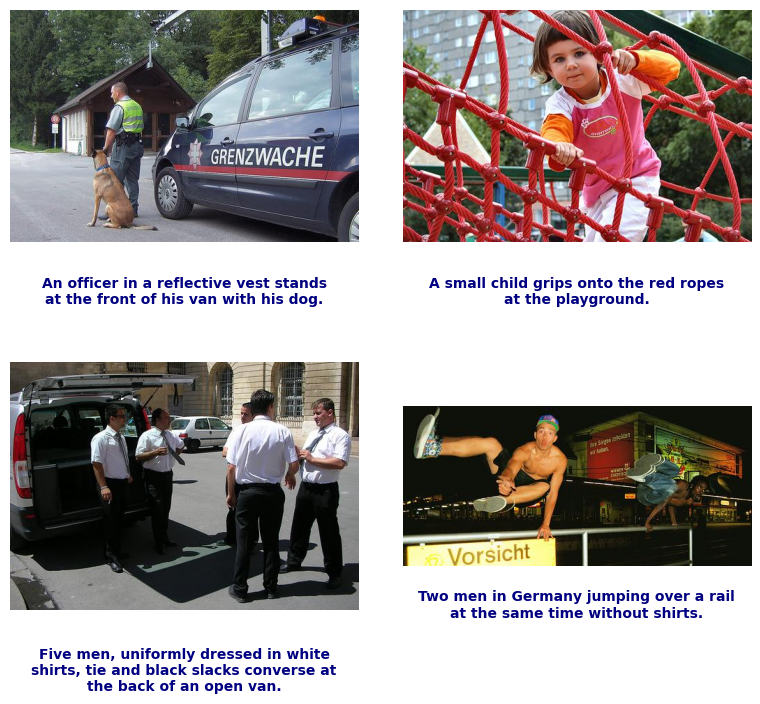

In [2]:
# Lets see some of the images and their corresponsing captions in the Flickr dataset.
import matplotlib.pyplot as plt
from textwrap import fill
import random

random_indices = [35, 28, 37, 9]

# Set up a 2x2 grid for the selected images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Iterate over the selected indices and their corresponding axes
for i, ax in enumerate(axs.flat):
    index = random_indices[i]
    image = images[index]
    caption = captions[index]

    ax.imshow(image)
    ax.axis('off')

    wrapped_caption = fill(caption, width=40)

    ax.text(0.5, -0.15, wrapped_caption, fontsize=10, fontweight='bold', color='navy',
            ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

OK, so now we've got out images stored in a list called "images" and our captions in a corresponding list called "captions"

First, let's check out one item in our list of images; a pil image object

In [3]:
print(images[1])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x7D8504D92510>


This means:

It’s a PIL Image object (technically: PIL.JpegImagePlugin.JpegImageFile, which is a subclass of PIL.Image.Image)

It’s in RGB color mode

Its dimensions are 500 pixels wide × 374 pixels tall

The part at the end (at 0x...) is just the memory address in your session — not important for your purposes

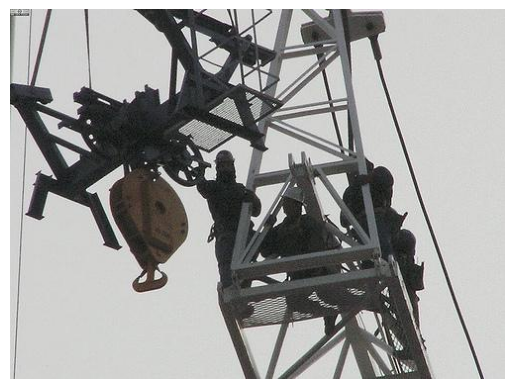

In [4]:
#and how we'd display, wiht matplotlib, inline

import matplotlib.pyplot as plt

plt.imshow(images[1])
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
#let's examine some other image objects to see if they're all the same size, etc.

In [5]:
images[0:20]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=335x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=330x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x230>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x335>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x351>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>,
 <PIL.Jpeg

What this shows is:

All your images are in RGB color (as expected).

Their sizes vary, but they’re all roughly in the 500px range, which is perfect for demoing object detection (no resizing needed yet).

They’re all standard JPG images, loaded cleanly as PIL image objects.


In [6]:
captions[0:20]

['Two young guys with shaggy hair look at their hands while hanging out in the yard.',
 'Several men in hard hats are operating a giant pulley system.',
 'A child in a pink dress is climbing up a set of stairs in an entry way.',
 'Someone in a blue shirt and hat is standing on stair and leaning against a window.',
 'Two men, one in a gray shirt, one in a black shirt, standing near a stove.',
 'Two people in the photo are playing the guitar and the other is poking at him.',
 'A man sits in a chair while holding a large stuffed animal of a lion.',
 'A girl is on rollerskates talking on her cellphone standing in a parking lot.',
 'An asian man wearing a black suit stands near a dark-haired woman and a brown-haired woman.',
 'Two men in Germany jumping over a rail at the same time without shirts.',
 'Five ballet dancers caught mid jump in a dancing studio with sunlight coming through a window.',
 'Three young men and a young woman wearing sneakers are leaping in midair at the top of a flig

We also have all of our images saved now in a folder, internally. This line of code saved them:

_imgpath = folder_path + f'image_{i}.jpg'

so image one for example should be at the path '/content/flickr30k_sample/images/image_1.jpg'

Let's say we want to visualize the image directly from that path it's saved at, as opposed to working with it as a PIL.image object

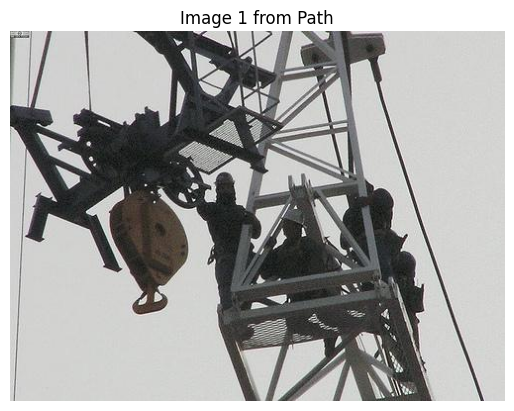

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/flickr30k_sample/images/image_1.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Image 1 from Path')
plt.show()


So, what's the difference between the file folder with the images locally saved and the pil.image objects (in the list called images?)?

Think of the image paths as the addresses of files on your computer: you can go fetch an image from that address any time. But once you bring it into Python using PIL.Image, it's like opening the photo in memory — ready to work with, display, or analyze. We keep both the paths and the loaded images so we have flexibility: either to work quickly from memory, or to re-load fresh images from disk as needed. That said, if our image sample was larger, we might just want to have the images in the folder (or library) but not load them all into memory as pil objects.

Cool ok so that's our data. Now, let's start playing with the images.

**Object detecion**

ok, we learned about object detection a bit in Distant Viewing. Let's start by running an object detection model on one of these images. Then we can break down the specifics of what we're doing in the code, what the model is, how it works, etc.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultr

100%|██████████| 6.25M/6.25M [00:00<00:00, 328MB/s]



image 1/1 /content/flickr30k_sample/images/image_1.jpg: 480x640 2 persons, 1 clock, 43.2ms
Speed: 15.2ms preprocess, 43.2ms inference, 358.7ms postprocess per image at shape (1, 3, 480, 640)


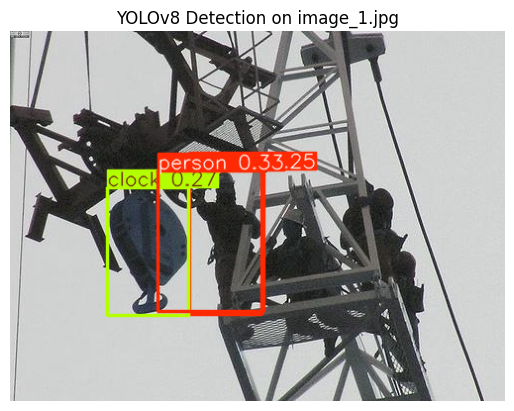

In [8]:
# Step 1: Install YOLOv8 (Ultralytics)
!pip install -q ultralytics

# Step 2: Load the YOLO model
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # 'n' = nano (fastest); also try 's', 'm', 'l', 'x' for larger models




image 1/1 /content/flickr30k_sample/images/image_1.jpg: 480x640 2 persons, 1 clock, 10.7ms
Speed: 4.4ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


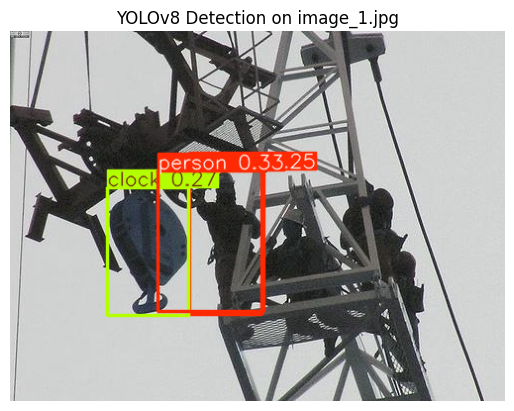

1. person (0.33 confidence)
2. clock (0.27 confidence)
3. person (0.25 confidence)


In [11]:

# Step 3: Define image path
img_path = '/content/flickr30k_sample/images/image_1.jpg'

# Step 4: Run object detection
results = model(img_path)

# Step 5: Visualize detections
import matplotlib.pyplot as plt
plt.imshow(results[0].plot(show=False))  # .plot() returns a NumPy array you can display
plt.axis('off')
plt.title('YOLOv8 Detection on image_1.jpg')
plt.show()

#Step 6: Get a textual version of the detections (objects and scores):

# Get the first result (since we only passed in one image)
r = results[0]
# Get box predictions
boxes = r.boxes  # this is a Boxes object
class_ids = boxes.cls.cpu().numpy()         # class indices
scores = boxes.conf.cpu().numpy()           # confidence scores
names = r.names                              # dict mapping class index → name
# Print results
for i, (cls_id, score) in enumerate(zip(class_ids, scores)):
    label = names[int(cls_id)]
    print(f"{i+1}. {label} ({score:.2f} confidence)")

Note that the number of objects put in bounding boxes is differnt from the total number listed as detected (and confidence scores). What does that suggest to you?

OK, that was an example of running the YOLO object detection model on one image, but now let's dive a bit more into the details of what this means, and how it runs, before playing with it at a larger scale

Some info on what we just did:

What Is YOLO?
-YOLO stands for You Only Look Once — it's a fast object detection model that detects and classifies multiple objects in a single image in one go.
-It predicts what objects are in an image and where they are (via bounding boxes)
-Unlike older models that "look" at an image in multiple passes (e.g., first for object proposals, then for classification), YOLO does everything in one single forward pass, making it very fast

How Was YOLO Trained?
-YOLO models (like YOLOv8) are pretrained on a large, labeled dataset called COCO (Common Objects in Context).
-The COCO dataset contains 330K images and 80 object categories, with bounding box annotations for each object.
-During training, the model learns: to recognize visual features associated with objects (like "dog", "person", "car"); to predict bounding box coordinates and confidence scores
-The latest versions (YOLOv5, YOLOv8) were trained using what are called data augmentation techniques (like flipping, scaling, color jittering) to improve robustness.

What Objects Can YOLO Detect?
YOLOv8 pretrained on COCO can detect 80 object categories
We can access a list of them in code:

In [12]:
model.names  # A dict mapping class index to class name


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

What Input Does the Model Take?

The model takes in a full image, either as:
-a file path (e.g., 'image.jpg')
-a NumPy array (e.g., np.array(PIL.Image))

Internally, it resizes the image (e.g., to 640×640 pixels) before processing.

What Does the Model Output?

The output is a list of detections, and each detection includes:
-a predicted class (e.g., "dog")
-a confidence score (e.g., 0.87) — how confident the model is in its prediction
-a bounding box (coordinates for drawing a box around the object)

In code, you can access:

result.boxes.cls → the predicted class IDs
result.boxes.conf → the confidence scores
result.boxes.xyxy → bounding box coordinates



Now that we understand all this, let's walk through another example, a next image in our set:


image 1/1 /content/flickr30k_sample/images/image_2.jpg: 640x480 1 person, 1 toilet, 47.4ms
Speed: 2.8ms preprocess, 47.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


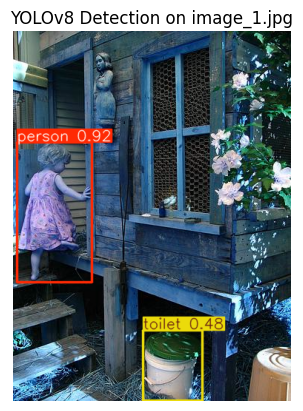

1. person (0.92 confidence)
2. toilet (0.48 confidence)


In [13]:

# Step 3: Define image path
img_path = '/content/flickr30k_sample/images/image_2.jpg'

# Step 4: Run object detection
results = model(img_path)

# Step 5: Visualize detections
import matplotlib.pyplot as plt
plt.imshow(results[0].plot(show=False))  # .plot() returns a NumPy array you can display
plt.axis('off')
plt.title('YOLOv8 Detection on image_1.jpg')
plt.show()

#Step 6: Get a textual version of the detections (objects and scores):

# Get the first result (since we only passed in one image)
r = results[0]
# Get box predictions
boxes = r.boxes  # this is a Boxes object
class_ids = boxes.cls.cpu().numpy()         # class indices
scores = boxes.conf.cpu().numpy()           # confidence scores
names = r.names                              # dict mapping class index → name
# Print results
for i, (cls_id, score) in enumerate(zip(class_ids, scores)):
    label = names[int(cls_id)]
    print(f"{i+1}. {label} ({score:.2f} confidence)")

Hmm, these results don't look amazing. Ok, but not amazing, so far. How can we think about this?

First, YOLO isn't the only model out there, and others are trained for more specialized tasks.

YOLO is popular because it’s fast and easy to use, but there are many other object detection models, each with different trade-offs.

Examples of others: faster R C-NN, DETR (detectron), etc.

Many models are trained on COCO, but advanced models are often trained on larger, domain-specific, or custom datasets — e.g., faces, medical images, industrial parts, etc.

So, for example, why might YOLO seem worse, e.g., than the face recognition models on my phone? Differnet training.

YOLO is a general-purpose model trained to detect only 80 classes
It doesn’t “know” about thousands of other everyday objects, like:

Specific people’s faces
Furniture beyond "chair" and "couch"
Logos, brands, dog breeds, etc.

If it hasn't seen an object in training (COCO), it can't detect it — so it might misclassify or just ignore it.

Your phone's face recognition, by comparison, is specialized

It's trained on faces only (not 80 generic categories)
Has custom, personalized training (on your face)
Often uses 3D depth sensors or infrared along with AI

So it's way more accurate — because it's narrow and personalized.

YOLO is “one size fits all” — which means it’s not tuned for subtlety or complexity; Good at finding things like “person”, “dog”, “car

OK, so if you have a very specific task (like, say, recognizing faces) you might seek out a more specific model. OR you might train your own image classifier (next week). But, let's just stick with this simple method of object detection for now. Let's try running it on more of our images and see the results

In [14]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the YOLO model (if not already loaded)
model = YOLO('yolov8n.pt')

# Define the base folder where the images are stored
folder_path = '/content/flickr30k_sample/images/'

# Loop through the first 10 images
for i in range(10):
    img_path = os.path.join(folder_path, f'image_{i}.jpg')
    print(f"\n🔍 Image {i}: {img_path}")

    # Run object detection
    results = model(img_path)
    r = results[0]

    # Display image with bounding boxes
    plt.imshow(r.plot(show=False))
    plt.axis('off')
    plt.title(f'Detections on image_{i}.jpg')
    plt.show()

    # Extract predictions
    boxes = r.boxes
    class_ids = boxes.cls.cpu().numpy()
    scores = boxes.conf.cpu().numpy()
    names = r.names

    # Print detected objects and confidence
    if len(class_ids) == 0:
        print("No objects detected.")
    else:
        print("Objects detected:")
        for j, (cls_id, score) in enumerate(zip(class_ids, scores)):
            label = names[int(cls_id)]
            print(f"  {j+1}. {label} ({score:.2f} confidence)")


Output hidden; open in https://colab.research.google.com to view.

Now let's run the model on all our images and get a tally of all the objects detected above a 25 percent threshold of confidence

In [16]:
from collections import Counter
#if we needed to load in YOLO again:
#from ultralytics import YOLO
import os

#if we needed to save and load in YOLO model again:
#model = YOLO('yolov8n.pt')


# Define folder and number of samples
folder_path = '/content/flickr30k_sample/images/'
num_samples = 250

# Set confidence threshold
CONF_THRESH = 0.25

# Counter to tally all detected objects
object_counts = Counter()

for i in range(num_samples):
    img_path = os.path.join(folder_path, f'image_{i}.jpg')

    # Run detection
    results = model(img_path)
    r = results[0]

    # Extract boxes, class IDs, and scores
    boxes = r.boxes
    class_ids = boxes.cls.cpu().numpy()
    scores = boxes.conf.cpu().numpy()
    names = r.names

    # Filter and count objects above threshold
    for cls_id, score in zip(class_ids, scores):
        if score >= CONF_THRESH:
            label = names[int(cls_id)]
            object_counts[label] += 1

# Show the top 10 most common detections
print("Top 10 detected objects:")
for label, count in object_counts.most_common(10):
    print(f"{label}: {count}")



image 1/1 /content/flickr30k_sample/images/image_0.jpg: 640x448 2 persons, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/flickr30k_sample/images/image_1.jpg: 480x640 2 persons, 1 clock, 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/flickr30k_sample/images/image_2.jpg: 640x480 1 person, 1 toilet, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/flickr30k_sample/images/image_3.jpg: 448x640 1 person, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/flickr30k_sample/images/image_4.jpg: 480x640 2 persons, 1 bottle, 1 cup, 1 bowl, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/flickr30k_sample/images/image_5.jpg: 448x640 3

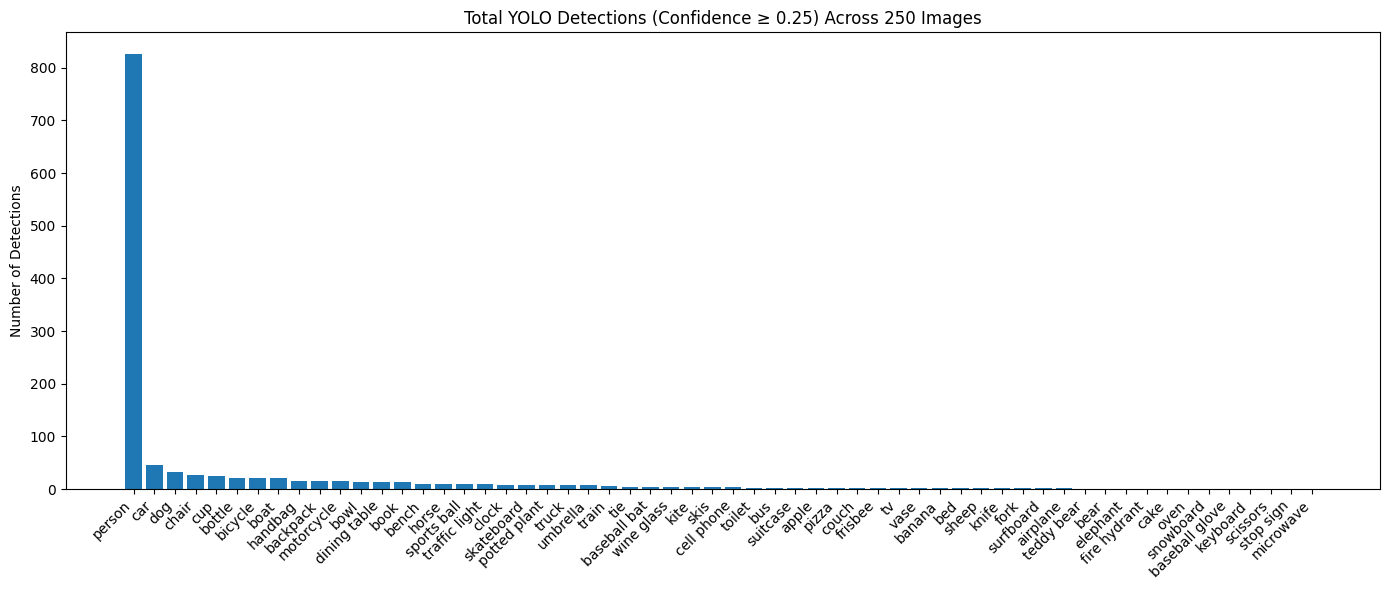

In [17]:
import matplotlib.pyplot as plt

# Sort counts
labels, counts = zip(*object_counts.most_common())

# Plot
plt.figure(figsize=(14, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Detections")
plt.title("Total YOLO Detections (Confidence ≥ 0.25) Across 250 Images")
plt.tight_layout()
plt.show()
